# Is Country Happiness Score Correlated to Gender Inequality?
## Final Project SI 330 - aholber

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Dataset #1: Happiness Ranking

In [3]:
happiness_2018 = pd.read_csv('archive/2018.csv')
happiness_2018.head(5)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [4]:
happiness_2018.tail(5)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038
155,156,Burundi,2.905,0.091,0.627,0.145,0.065,0.149,0.076


In [5]:
happiness_2018.shape

(156, 9)

### Dataset #2: Gender Inequality Factors
The second dataset can be downloaded as an Excel file. I have already cleaned up the file in Excel - making it readable in pandas and removing excess data. After I read in the file, I remove any rows that do not have data for the total Gender Inequality Index Rank because I will need this number in order to fully compare the two datasets.

In [6]:
gender_inequality = pd.read_excel('Gender_Inequality_Index.xlsx')
gender_inequality = gender_inequality[gender_inequality['Gender Inequality Index Value'] != '..']
gender_inequality.sort_values(by=['Gender Inequality Index Value'], ascending=True).head(5)

,HDI rank,Country or region,Gender Inequality Index Value,Gender Inequality Index Rank,Maternal Mortality Ratio,Adolescent Birth Rate,Seats in Parliament Held by Women (%),Female Population with Secondary Education,Male Population with Secondary Education,Female Labour Force Participation Rate (%),Male Labour Force Participation Rate (%)
1,2,Switzerland,0.036719,1,5,2.763,29.268293,96.37136,97.16259,62.6,74.1
10,11,Denmark,0.039597,2,6,4.123,37.430168,89.18014,89.4327,58.1,65.9
7,8,Sweden,0.040218,2,4,5.076,46.131805,88.81367,88.979,61.1,67.6
9,10,Netherlands,0.04111,4,7,3.788,35.555556,86.56447,90.0668,58,68.9
0,1,Norway,0.044116,5,5,5.141,41.420118,96.06669,94.8103,60.2,66.7


In [7]:
gender_inequality.tail(5)

,HDI rank,Country or region,Gender Inequality Index Value,Gender Inequality Index Rank,Maternal Mortality Ratio,Adolescent Birth Rate,Seats in Parliament Held by Women (%),Female Population with Secondary Education,Male Population with Secondary Education,Female Labour Force Participation Rate (%),Male Labour Force Participation Rate (%)
183,184,Mali,0.676104,158,587,169.127,8.843537,7.34422,16.381122,61.3,80.9
184,185,Burundi,0.519578,124,712,55.59,38.75,7.5,11.02,80.4,77.6
186,187,Chad,0.700681,160,856,161.09,15.254237,1.738381,10.313367,64.8,77.9
187,188,Central African Republic,0.682079,159,882,129.074,8.571429,13.42,31.08,64.7,79.8
188,189,Niger,0.647448,154,553,186.538,16.959064,4.28,8.88,67.3,90.5


In [8]:
gender_inequality.shape

(162, 11)

### Merging the datasets
I join the two datasets using an inner join which will eliminate a few countries and regions. I use inner because I need all the information from both sets to make the comparisions

In [9]:
df = happiness_2018.merge(gender_inequality, on='Country or region', how='inner')

In [10]:
df.sample(5)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,HDI rank,Gender Inequality Index Value,Gender Inequality Index Rank,Maternal Mortality Ratio,Adolescent Birth Rate,Seats in Parliament Held by Women (%),Female Population with Secondary Education,Male Population with Secondary Education,Female Labour Force Participation Rate (%),Male Labour Force Participation Rate (%)
37,41,Nicaragua,6.141,0.668,1.319,0.700,0.527,0.208,0.128,126,0.454702,105,150,84.99,45.652174,48.28,46.56,50.7,83.7
118,142,Angola,3.795,0.730,1.125,0.269,0.000,0.079,0.061,149,0.577999,144,477,150.526,30.454545,23.103976,38.055685,75.4,80.1
33,36,Spain,6.310,1.251,1.538,0.965,0.449,0.142,0.074,25,0.07411,15,5,7.725,38.636364,73.31044,78.44979,51.7,63.4
125,151,Rwanda,3.408,0.332,0.896,0.400,0.636,0.200,0.444,157,0.412385,95,290,39.114,55.660377,12.86,17.909753,84.2,83.6
10,11,United Kingdom,7.190,1.244,1.433,0.888,0.464,0.262,0.082,15,0.11919,27,9,13.37,28.938237,82.87522,85.72602,57.1,67.8


### Q1: What factors of gender inequality are most correlated with the happiness scores?

Here I create scatterplots for happiness score vs. each different gender specific variable. The variables include: maternal mortality ratio, adolescent birth rate, percentage of seats in parliament held by women, female to male ratio with secondary education, and female to male ratio of labor force participation. Scatter plots are best when analyzing two quantitative measurements.

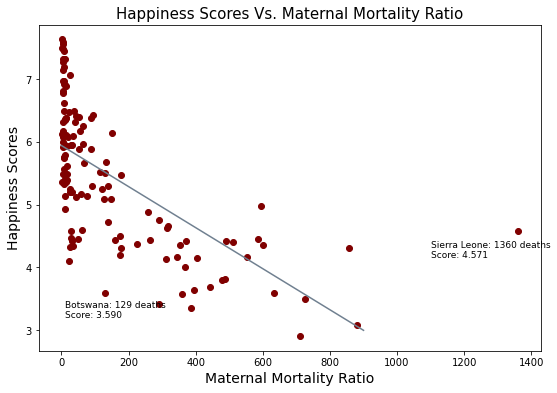

In [380]:
fig, ax = plt.subplots(figsize = (9, 6))

plt.xlabel('Maternal Mortality Ratio', fontsize=14)
plt.ylabel('Happiness Scores', fontsize=14)
plt.title('Happiness Scores Vs. Maternal Mortality Ratio', fontsize=15)

x = pd.to_numeric(df['Maternal Mortality Ratio'])
y = df['Score']
ax.scatter(x, y, color='maroon')

plt.annotate("Sierra Leone: 1360 deaths\nScore: 4.571", xy=(1100, 4.15), xytext=(1100,4.15),fontsize=9,)
plt.annotate("Botswana: 129 deaths\nScore: 3.590", xy=(10, 3.2), xytext=(10, 3.2),fontsize=9,)

#Plotting linear regression
b, a = np.polyfit(x,y, deg=1)
xseq = np.linspace(0, 900, num=9000)
ax.plot(xseq, a + b * xseq, color="slategrey");

In [336]:
df.sort_values(by=['Maternal Mortality Ratio'], ascending=False).head(7)[['Country or region', 'Maternal Mortality Ratio', 'Score']]

,Country or region,Maternal Mortality Ratio,Score
92,Sierra Leone,1360,4.571
127,Central African Republic,882,3.083
109,Chad,856,4.301
124,Liberia,725,3.495
128,Burundi,712,2.905
122,Malawi,634,3.587
104,Mauritania,602,4.356


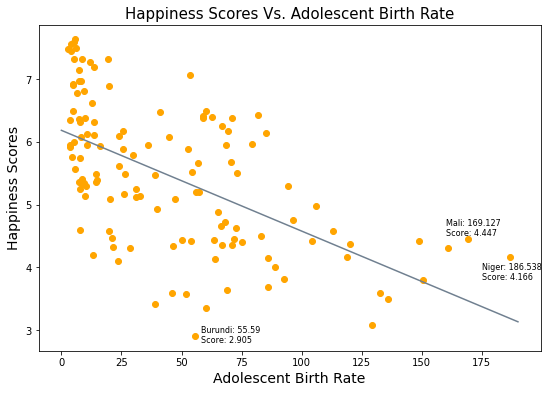

In [379]:
fig, ax = plt.subplots(figsize = (9, 6))

plt.xlabel('Adolescent Birth Rate', fontsize=14)
plt.ylabel('Happiness Scores', fontsize=14)
plt.title('Happiness Scores Vs. Adolescent Birth Rate', fontsize=15)

x = pd.to_numeric(df['Adolescent Birth Rate'])
y = df['Score']
ax.scatter(x, y, color='orange')

plt.annotate("Niger: 186.538 \nScore: 4.166", xy=(175, 3.8),fontsize=8,)
plt.annotate("Mali: 169.127\nScore: 4.447", xy=(160, 4.5),fontsize=8,)
plt.annotate("Burundi: 55.59\nScore: 2.905", xy=(58,2.8),fontsize=8,)

#Plotting linear regression
b, a = np.polyfit(x,y, deg=1)
xseq = np.linspace(0, 190, num=2000)
ax.plot(xseq, a + b * xseq, color="slategrey");

In [350]:
df.sort_values(by=['Adolescent Birth Rate'], ascending=False).head(7)[['Country or region', 'Adolescent Birth Rate', 'Score']]


,Country or region,Adolescent Birth Rate,Score
111,Niger,186.538,4.166
96,Mali,169.127,4.447
109,Chad,161.09,4.301
118,Angola,150.526,3.795
101,Mozambique,148.626,4.417
124,Liberia,135.962,3.495
122,Malawi,132.671,3.587


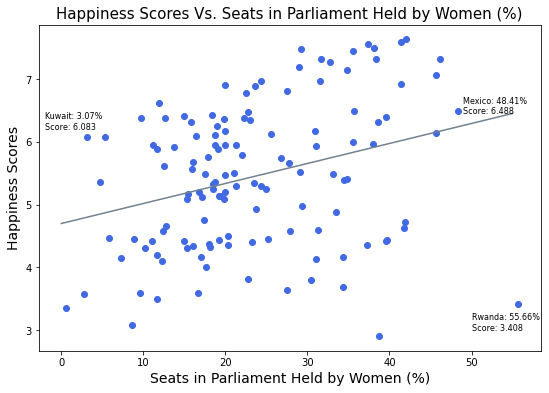

In [378]:
fig, ax = plt.subplots(figsize = (9, 6))

plt.xlabel('Seats in Parliament Held by Women (%)', fontsize=14)
plt.ylabel('Happiness Scores', fontsize=14)
plt.title('Happiness Scores Vs. Seats in Parliament Held by Women (%)', fontsize=15)

x = pd.to_numeric(df['Seats in Parliament Held by Women (%)'])
y = df['Score']
ax.scatter(x, y, color='royalblue')

plt.annotate("Rwanda: 55.66% \nScore: 3.408", xy=(50, 3),fontsize=8,)
plt.annotate("Kuwait: 3.07%\nScore: 6.083", xy=(-2, 6.2),fontsize=8,)
plt.annotate("Mexico: 48.41%\nScore: 6.488", xy=(49,6.45),fontsize=8,)

#Plotting linear regression
b, a = np.polyfit(x,y, deg=1)
xseq = np.linspace(0, 55, num=6000)
ax.plot(xseq, a + b * xseq, color="slategrey");

In [351]:
df.sort_values(by=['Seats in Parliament Held by Women (%)'], ascending=False)[['Country or region', 'Seats in Parliament Held by Women (%)', 'Score']]

,Country or region,Seats in Parliament Held by Women (%),Score
125,Rwanda,55.660377,3.408
22,Mexico,48.407643,6.488
8,Sweden,46.131805,7.314
37,Nicaragua,45.652174,6.141
12,Costa Rica,45.614035,7.072
...,...,...,...
42,Thailand,5.284553,6.072
68,Lebanon,4.6875,5.358
41,Kuwait,3.076923,6.083
123,Haiti,2.739726,3.582


In [458]:
df['Secondary Education Ratio (w/m)']=pd.to_numeric(df['Female Population with Secondary Education']/df['Male Population with Secondary Education'])

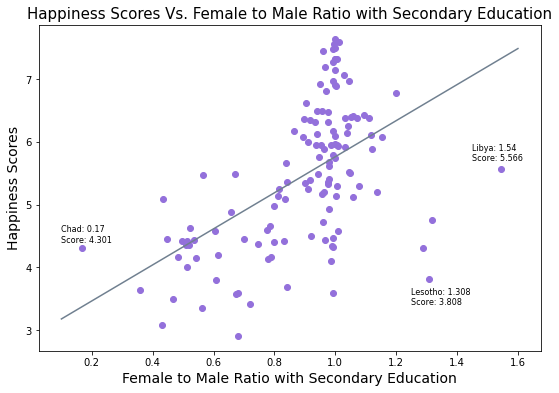

In [459]:
fig, ax = plt.subplots(figsize = (9, 6))

plt.xlabel('Female to Male Ratio with Secondary Education', fontsize=14)
plt.ylabel('Happiness Scores', fontsize=14)
plt.title('Happiness Scores Vs. Female to Male Ratio with Secondary Education', fontsize=15)

x = df['Secondary Education Ratio (w/m)']
y = df['Score']
ax.scatter(x, y, color='mediumpurple')

plt.annotate("Lesotho: 1.308 \nScore: 3.808", xy=(1.25, 3.4),fontsize=8,)
plt.annotate("Libya: 1.54\nScore: 5.566", xy=(1.45, 5.7),fontsize=8,)
plt.annotate("Chad: 0.17\nScore: 4.301", xy=(0.1,4.4),fontsize=8,)

#Plotting linear regression
b, a = np.polyfit(x,y, deg=1)
xseq = np.linspace(0.1, 1.6, num=1000)
ax.plot(xseq, a + b * xseq, color="slategrey");

In [361]:
df.sort_values(by=['Secondary Education Ration (w/m)'], ascending=False)[['Country or region', 'Secondary Education Ration (w/m)', 'Score']]

,Country or region,Secondary Education Ration (w/m),Score
59,Libya,1.542705,5.566
86,Gabon,1.317798,4.758
117,Lesotho,1.308367,3.808
108,Myanmar,1.286482,4.308
19,United Arab Emirates,1.200122,6.774
...,...,...,...
96,Mali,0.448334,4.447
82,Bhutan,0.434012,5.082
127,Central African Republic,0.431789,3.083
120,Afghanistan,0.358072,3.632


In [11]:
df['Labour Force Participation Rate (w/m)']=pd.to_numeric(df['Female Labour Force Participation Rate (%)']/df['Male Labour Force Participation Rate (%)'])

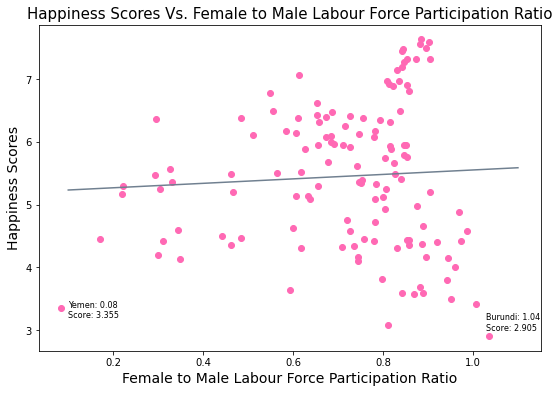

In [12]:
fig, ax = plt.subplots(figsize = (9, 6))

plt.xlabel('Female to Male Labour Force Participation Ratio', fontsize=14)
plt.ylabel('Happiness Scores', fontsize=14)
plt.title('Happiness Scores Vs. Female to Male Labour Force Participation Ratio', fontsize=15)

x = df['Labour Force Participation Rate (w/m)']
y = df['Score']
ax.scatter(x, y, color='hotpink')

plt.annotate("Burundi: 1.04 \nScore: 2.905", xy=(1.03, 3),fontsize=8,)
plt.annotate("Yemen: 0.08\nScore: 3.355", xy=(0.1, 3.2),fontsize=8,)

#Plotting linear regression
b, a = np.polyfit(x,y, deg=1)
xseq = np.linspace(0.1, 1.1, num=1000)
ax.plot(xseq, a + b * xseq, color="slategrey");

In [13]:
df.sort_values(by=['Labour Force Participation Rate (w/m)'], ascending=False)[['Country or region', 'Labour Force Participation Rate (w/m)', 'Score']]

,Country or region,Labour Force Participation Rate (w/m),Score
128,Burundi,1.036082,2.905
125,Rwanda,1.007177,3.408
92,Sierra Leone,0.986325,4.571
101,Mozambique,0.973618,4.417
85,Nepal,0.968009,4.880
...,...,...,...
64,Pakistan,0.293252,5.472
72,Algeria,0.221068,5.295
77,Jordan,0.220312,5.161
95,Iraq,0.170799,4.456


### Q2: Is the Human Development Index (HDI) rank directly related to a country's happiness score?

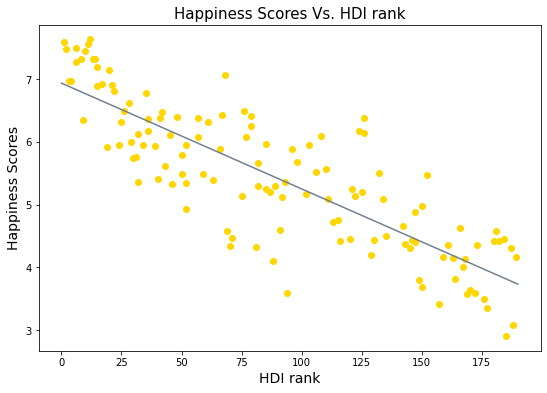

In [460]:
fig, ax = plt.subplots(figsize = (9, 6))

plt.xlabel('HDI rank', fontsize=14)
plt.ylabel('Happiness Scores', fontsize=14)
plt.title('Happiness Scores Vs. HDI rank', fontsize=15)

x = df['HDI rank']
y = df['Score']
ax.scatter(x, y, color='gold')

#Plotting linear regression
b, a = np.polyfit(x,y, deg=1)
xseq = np.linspace(0, 190, num=6000)
ax.plot(xseq, a + b * xseq, color="slategrey");

### Q3: Is female population with secondary education related to freedom to make life choices or generosity?

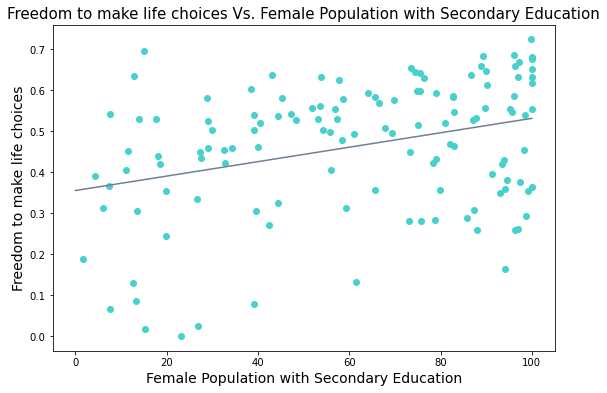

In [415]:
fig, ax = plt.subplots(figsize = (9, 6))

plt.xlabel('Female Population with Secondary Education', fontsize=14)
plt.ylabel('Freedom to make life choices', fontsize=14)
plt.title('Freedom to make life choices Vs. Female Population with Secondary Education', fontsize=15)

x = pd.to_numeric(df['Female Population with Secondary Education'])
y = df['Freedom to make life choices']
ax.scatter(x, y, color='mediumturquoise')

#Plotting linear regression
b, a = np.polyfit(x,y, deg=1)
xseq = np.linspace(0, 100, num=6000)
ax.plot(xseq, a + b * xseq, color="slategrey");

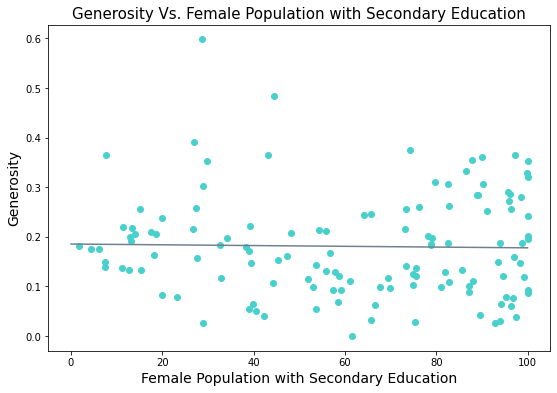

In [416]:
fig, ax = plt.subplots(figsize = (9, 6))

plt.xlabel('Female Population with Secondary Education', fontsize=14)
plt.ylabel('Generosity', fontsize=14)
plt.title('Generosity Vs. Female Population with Secondary Education', fontsize=15)

x = pd.to_numeric(df['Female Population with Secondary Education'])
y = df['Generosity']
ax.scatter(x, y, color='mediumturquoise')

#Plotting linear regression
b, a = np.polyfit(x,y, deg=1)
xseq = np.linspace(0, 100, num=6000)
ax.plot(xseq, a + b * xseq, color="slategrey");

## Q4: How is happiness related to GDP per capita?

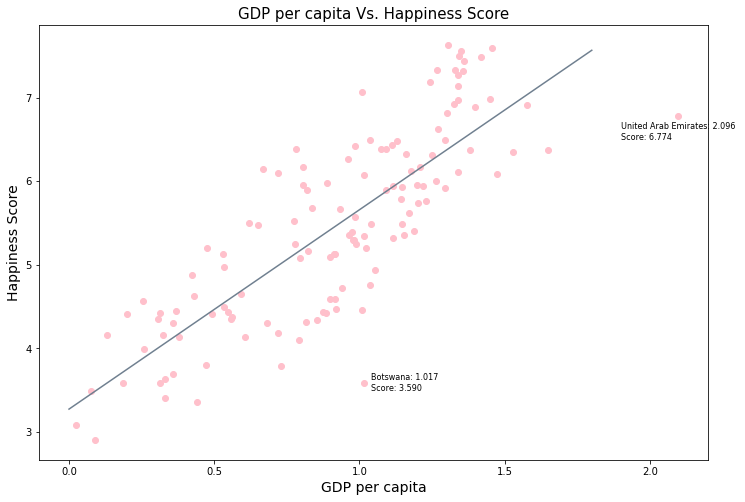

In [456]:
fig, ax = plt.subplots(figsize = (12, 8))

plt.xlabel('GDP per capita', fontsize=14)
plt.ylabel('Happiness Score', fontsize=14)
plt.title('GDP per capita Vs. Happiness Score', fontsize=15)

x = df['GDP per capita']
y = df['Score']
ax.scatter(x, y, color='pink')


plt.annotate("United Arab Emirates: 2.096 \nScore: 6.774", xy=(1.9, 6.5),fontsize=8,)
plt.annotate("Botswana: 1.017\nScore: 3.590", xy=(1.04, 3.5),fontsize=8,)

#Plotting linear regression
b, a = np.polyfit(x,y, deg=1)
xseq = np.linspace(0, 1.8, num=6000)
ax.plot(xseq, a + b * xseq, color="slategrey");

In [450]:
df.sort_values(by=['GDP per capita'], ascending=False)[['Country or region', 'GDP per capita', 'Score']]
#df.sort_values(by=['Score'], ascending=True).head(8)[['Country or region', 'GDP per capita', 'Score']]

,Country or region,GDP per capita,Score
19,United Arab Emirates,2.096,6.774
29,Qatar,1.649,6.374
16,Luxembourg,1.576,6.910
31,Singapore,1.529,6.343
41,Kuwait,1.474,6.083
...,...,...,...
122,Malawi,0.186,3.587
111,Niger,0.131,4.166
128,Burundi,0.091,2.905
124,Liberia,0.076,3.495
